In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
vehicles = pd.read_csv("vehicles.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,19UUA8F22CA003926,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,NaN,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,clean,automatic,5J6YH18314L006498,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,clean,automatic,1GC1KWE85GF266427,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


## 1. Data Cleaning

# EDA

In [34]:
vehiclesC.describe()

,price,year,cylinders,odometer
count,483677.000000,483677.000000,483677.000000,483677.000000
mean,14000.427719,2009.361078,4.250053,101924.290207
std,11882.633685,9.971228,1.640145,58792.249416
min,503.000000,1819.000000,1.000000,0.000000
25%,5800.000000,2006.000000,3.000000,54377.000000
50%,10995.000000,2011.000000,5.000000,101380.000000
75%,18995.000000,2015.000000,6.000000,142163.000000
max,479000.000000,2021.000000,8.000000,499103.000000


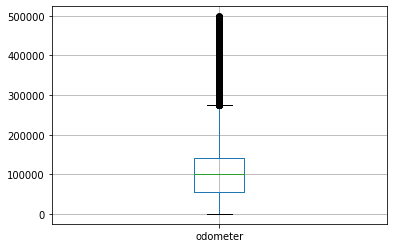

In [35]:
vehiclesC[['odometer']].boxplot()

# Data Selection

In [11]:
vehiclesC = vehicles.copy()

In [12]:
#drop columns that is not relevant or has repeated value
vehiclesC = vehiclesC.drop(columns = ['size','county','condition','id','image_url','url','region_url','lat','long'])

# Data Imputation

In [15]:
#proportion of null values before imputation
(vehiclesC.isnull().sum()/vehiclesC.shape[0]).sort_values()

region          0.000000
price           0.000000
state           0.000000
description     0.000043
year            0.001916
title_status    0.005390
fuel            0.006411
transmission    0.006948
model           0.014081
manufacturer    0.041411
odometer        0.175127
type            0.273519
drive           0.285927
paint_color     0.316527
cylinders       0.395533
vin             0.422931
dtype: float64

In [16]:
# clean features base on descriptions
def column_cleaner(row):
    if pd.isna(row[col]):
        if pd.isna(row['description']) == False:
            lst = row['description'].lower().split(' ')
            for i in lst:
                if i in unique_values:
                    return i
            else:
                return row[col]
    else:
        return row[col]

In [17]:
# apply to column cleaner based on description columns listed below
for col in ["type", "manufacturer", "drive", "paint_color", "cylinders"]:
    print(col)
    unique_values = vehiclesC[col].unique()
    unique_values = [x for x in unique_values if str(x) != 'nan']

    column_cleaned = vehiclesC.apply(column_cleaner, axis = 1)

    
    print("Number of null values before cleaning: " + str(vehiclesC[col].isnull().sum()))
    print("Number of null values after cleaning: " + str(column_cleaned.isnull().sum()))
    
    #replaces the new cleaned column in dataset 
    vehiclesC[col] = column_cleaned

type
Number of null values before cleaning: 132595
Number of null values after cleaning: 86550
manufacturer
Number of null values before cleaning: 20075
Number of null values after cleaning: 13351
drive
Number of null values before cleaning: 138610
Number of null values after cleaning: 123336
paint_color
Number of null values before cleaning: 153444
Number of null values after cleaning: 105353
cylinders
Number of null values before cleaning: 191744
Number of null values after cleaning: 151210


In [18]:
#fill rest of missing values with distribution imputation from the
# corresponding columns
def quantitative_distribution(child, N):
    """
    quantitative_distribution that takes in a Series and an integer
    N > 0, and returns an array of N samples from the distribution of
    values of the Series as described in the question.
    """   
    p, bin_edges = np.histogram(child[~child.isnull()], bins = 10)
    p = p / sum(p)
    bin_width = np.diff(bin_edges)
    
    rand_choice = np.random.choice(bin_edges[:-1], size=N, replace=True, p=p)
    
    choices = [np.random.uniform(i, i+bin_width[0]) for i in rand_choice]
    
    return np.round_(list(np.array(choices)))

def impute_height_quant(child):
    """
    impute_height_quant takes in a Series of child heights
    with missing values and imputes them using the scheme in
    the question.
    """
    num_null = child.isnull().sum() # number of nan vals

    fill_vals = quantitative_distribution(child, num_null) 
    child[child.isnull()] = fill_vals

    return child

In [19]:
#fill with distribution for columns listed below
columns = ["fuel", "title_status", "transmission", "type","cylinders", "manufacturer", "drive"]
for col in columns:
    print(col)
    print("number of null before data imputation: " + str(vehiclesC[col].isnull().sum()))
    
    unique_values = vehiclesC[col].unique()
    unique_values = [x for x in unique_values if str(x) != 'nan']
    unique_values = [x for x in unique_values if str(x) != "None"]

    
    dic = {}
    for i in range(len(unique_values)):
        dic[unique_values[i]] = i + 1

    dic2 = {}
    for j in range(len(unique_values)):
        dic2[j+1] = unique_values[j]

    
    vehiclesC[col] = vehiclesC[col].replace(dic)
    vehiclesC[col] = impute_height_quant(vehiclesC[col]).replace(dic2)
    print("number of null after data imputation: " + str(vehiclesC[col].isnull().sum()))

fuel
number of null before data imputation: 3108
number of null after data imputation: 0
title_status
number of null before data imputation: 2613
number of null after data imputation: 0
transmission
number of null before data imputation: 3368
number of null after data imputation: 0
type
number of null before data imputation: 86550
number of null after data imputation: 0
cylinders
number of null before data imputation: 151210
number of null after data imputation: 0
manufacturer
number of null before data imputation: 13351
number of null after data imputation: 0
drive
number of null before data imputation: 123336
number of null after data imputation: 0


In [20]:
#impute "year" column with distribution
imputed_year_column = impute_height_quant(vehiclesC['year'])
vehiclesC.year = imputed_year_column

In [22]:
# replace incorrect values with correct values
vehiclesC['year'] = vehiclesC['year'].replace(0.0, 2019.0)
vehiclesC['year'] = vehiclesC['year'].replace(1908.0, 2018.0)
# get grouped odometer by year
grpedYr_odoCount = vehiclesC.groupby('year')['odometer'].count()
odometer_by_year = vehiclesC.groupby('year')['odometer'].median().drop(labels =[2021])
# impute odometer by year
def fill_odo_by_year(series):
    if pd.isna(series['year']):
        return series
    if series['year'] == 2021.0:
        series['odometer'] = 0
        return series
    if pd.isna(series['odometer']):
        series['odometer'] = odometer_by_year[series['year']]
        return series
    else:
        return series
print("Number of null values before cleaning: " + str(vehiclesC['odometer'].isnull().sum()))
vehiclesC[['year','odometer']] = vehiclesC[['year','odometer']].agg(fill_odo_by_year,axis = 'columns')
print("Number of null values after cleaning: " + str(vehiclesC['odometer'].isnull().sum()))

Number of null values before cleaning: 84897
Number of null values after cleaning: 1


In [23]:
#remove outliers
vehiclesC = vehiclesC[(vehiclesC['price'] > 500) & (vehiclesC['price'] < 500000)]
vehiclesC = vehiclesC[vehiclesC['odometer'] < 500000]

In [24]:
#prportion of missing values after distribtuion imputation
(vehiclesC.isnull().sum()/vehiclesC.shape[0]).sort_values()

region          0.000000
price           0.000000
year            0.000000
manufacturer    0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
drive           0.000000
type            0.000000
state           0.000000
description     0.000041
model           0.014038
paint_color     0.217271
vin             0.422819
dtype: float64

# Create Model Ready Dataset

In [ ]:
#cylinder column to ordinal data 
cylinder_dic = {'6 cylinders':5, '8 cylinders':6, '4 cylinders':3, 'other':1,
        '5 cylinders':4, '3 cylinders':2, '10 cylinders':7, '12 cylinders':8}
vehiclesC["cylinders"] = vehiclesC["cylinders"].replace(cylinder_dic)

In [28]:
#create a copy of cleaned dataset
vehmodel = vehiclesC.copy()
vehmodel.head(3)

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,vin,drive,type,paint_color,description,state
0,greensboro,10299,2012.0,acura,tl,5,gas,90186.0,clean,automatic,19UUA8F22CA003926,4wd,other,blue,2012 Acura TL Base 4dr Sedan Offered by: B...,nc
2,greensboro,9500,2011.0,jaguar,xf,5,gas,85000.0,clean,automatic,NaN,fwd,other,blue,2011 jaguar XF premium - estate sale. Retired ...,nc
3,greensboro,3995,2004.0,honda,element,5,gas,212526.0,clean,automatic,5J6YH18314L006498,fwd,SUV,orange,2004 Honda Element LX 4dr SUV Offered by: ...,nc


In [29]:
#drop columns- those that still have null values
vehmodel = vehmodel.drop(["model", "vin", "description", "paint_color"], axis = 1)

In [30]:
#label out feature types
ordinal_cols = ["cylinders", "year"]
categorical_cols = ["region", "manufacturer", "fuel", "title_status", "transmission", "drive", "type", "state"]
numerical_cols = ["odometer"]

Data Types:
    - region: categorical
    - year: categorical/ordinal
    - manufacturer: categorical 
    - model: categorical
    - cylinders: categorical  
    - fuel: categorical 
     - odometer: numerical
     - title_status: categorical 
     - transmission: categorical  
     - drive: categorical 
     - type: categorical 
     - paint_color: categorical 
     - state: categorical 

In [31]:
#ordianl encode categorical variables
for col in categorical_cols:
    unique_values = vehmodel[col].unique()
    
    dic = {}
    for i in range(len(unique_values)):
        dic[unique_values[i]] = i + 1

    vehmodel[col] = vehmodel[col].replace(dic)

In [32]:
#double checking one last time the features have no null values
(vehmodel.isnull().sum()/vehmodel.shape[0]).sort_values()

region          0.0
price           0.0
year            0.0
manufacturer    0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
state           0.0
dtype: float64

In [33]:
vehmodel.head()

,region,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,1,10299,2012.0,1,5,1,90186.0,1,1,1,1,1
2,1,9500,2011.0,2,5,1,85000.0,1,1,2,1,1
3,1,3995,2004.0,3,5,1,212526.0,1,1,2,2,1
4,2,41988,2016.0,4,6,1,48828.0,1,1,1,3,2
5,1,12995,2015.0,5,1,1,85127.0,1,1,1,4,1


In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer,Binarizer, QuantileTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

#need pip install xgboost beforehand
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

#need pip install lightgbm beforehand
from lightgbm import LGBMRegressor

# Baseline Model: Linear Regression

In [100]:
#fit linear model through dataset
X = vehmodel.drop(["price"], axis = 1)
y = vehmodel.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
reg = LinearRegression().fit(X_train, y_train)
reg_r2_test = reg.score(X_test, y_test)
reg_r2_train = reg.score(X_test, y_test)

In [102]:
#r2 for linear model
reg_r2_train,reg_r2_test

(0.40252355139696183, 0.40252355139696183)

In [103]:
y_true = y_test
y_pred_reg_test = reg.predict(X_test)
y_pred_reg_train = reg.predict(X_train)

rmse_test_reg = np.sqrt(mean_squared_error(y_true, y_pred_reg_test))
rmse_train_reg = np.sqrt(mean_squared_error(y_train, y_pred_reg_train))
#rmse for linear model
rmse_train_reg,rmse_test_reg

(9479.359335998517, 8952.624398702588)

# DecisionTree Regressor

In [104]:
vehmodel = vehiclesC.copy()

In [105]:
#DecisionTree Regressor
preproc = ColumnTransformer(transformers=[
                                          ('encode', OneHotEncoder(handle_unknown = 'ignore'),
                                           ['region','manufacturer','fuel','title_status','transmission','drive','type','state']),
                                           ('functiontrans', FunctionTransformer(),['cylinders','year','odometer'])
                                         ])
regr = DecisionTreeRegressor()
pl = Pipeline(steps = [('preprocessor',preproc),
                       ('baseline regression', regr)])
X = vehmodel.drop(["price"], axis = 1)
y = vehmodel.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dec_tree_reg = pl.fit(X_train,y_train)

dec_tree_reg_r2_train = dec_tree_reg.score(X_test,y_test)
dec_tree_reg_r2_test = dec_tree_reg.score(X_train,y_train)
#r2 for decision tree
dec_tree_reg_r2_train, dec_tree_reg_r2_test

(0.6042280522659349, 0.9996561121620678)

In [106]:
y_true = y_test
y_pred_dec_test = dec_tree_reg.predict(X_test)
y_pred_dec_train = dec_tree_reg.predict(X_train)
rmse_test_dec = np.sqrt(mean_squared_error(y_true, y_pred_dec_test))
rmse_train_dec = np.sqrt(mean_squared_error(y_train, y_pred_dec_train))
#rmse for decision tree
rmse_train_dec,rmse_test_dec

(221.52484274828808, 7417.984583213919)

# Random Forest Tree

In [133]:
#categorical_columns
cat_cols = ["region", 'year', 'manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type','state']
cat_transform = Pipeline([('one-hot', OneHotEncoder(handle_unknown = 'ignore'))])

#func trans 
func_trans_cols = ['cylinders','odometer']
func_transform = Pipeline([('func-transform', FunctionTransformer())])

#column transformer
preproc = ColumnTransformer(transformers=[('cat', cat_transform, cat_cols), \
                                          ('func', func_transform, func_trans_cols)
                                         ]) 

#pipeline to return 
pl = Pipeline(steps=[('preprocessor', preproc), ('tree', RandomForestRegressor(1))])

#setting X and y
X = vehmodel.drop('price', axis=1)
y = vehmodel['price']

# fit and predict price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
pl.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('one-hot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                               

In [134]:
ran_tree_reg_r2_train = pl.score(X_train,y_train)
ran_tree_reg_r2_test = pl.score(X_test,y_test)
#random forest r2
ran_tree_reg_r2_train, ran_tree_reg_r2_test

(0.8348570459453719, 0.5744738364403519)

In [135]:
train_pred = pl.predict(X_train)
ran_tree_train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

tester_pred = pl.predict(X_test)
ran_tree_tester_rmse = np.sqrt(mean_squared_error(y_test, tester_pred))
#random forest rmse
ran_tree_train_rmse,ran_tree_tester_rmse

(4840.583062283251, 7759.233335958982)

# AdaBoost Regressor

In [168]:
#using all columns 
X = vehmodel.drop(["price"], axis = 1)
y = vehmodel.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr = AdaBoostRegressor(n_estimators=100, random_state=0)
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [169]:
#rmse 
train_pred = regr.predict(X_train)
ada_tree_train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
tester_pred = regr.predict(X_test)
ada_tree_tester_rmse = np.sqrt(mean_squared_error(y_test, tester_pred))
ada_tree_train_rmse,ada_tree_tester_rmse

(11450.617358379035, 11582.107576032395)

In [171]:
ada_tree_reg_r2_train = regr.score(X_train,y_train)
ada_tree_reg_r2_test = regr.score(X_test,y_test)
ada_tree_reg_r2_train, ada_tree_reg_r2_test

(0.07247651367609853, 0.062272876995415505)

# XGboostRegressor

In [142]:
#categorical_columns, 
cat_cols = ["region", 'year', 'manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type','state']
cat_transform = Pipeline([('one-hot', OneHotEncoder(handle_unknown = 'ignore'))])

#func trans
func_trans_cols = ['cylinders','odometer']
func_transform = Pipeline([('func-transform', FunctionTransformer())])

# ordinal encode
ord_trans_cols = ['cylinders']
ord_transform = Pipeline([('ordinal', OrdinalEncoder())])

#column transformer
preproc = ColumnTransformer(
    transformers=[('cat', cat_transform, cat_cols),
                  ('func', func_transform, func_trans_cols),
                ('ord', ord_transform, ord_trans_cols)
                ]) 

#pipeline to return 
pl = Pipeline(steps=[('preprocessor', preproc),
                     ('tree', xgb.XGBRegressor(colsample_bytree=0.7, 
                                               gamma=0.2, learning_rate=0.1,
                                               max_depth=6, n_estimators=700,
                                               random_state=4))])

#setting X and y
X = vehmodel.drop('price', axis=1)
y = vehmodel['price']

# fit and predict price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
xgb_fitted = pl.fit(X_train, y_train)

0.6990823941874625

In [143]:
xg_tree_reg_r2_train = xgb_fitted.score(X_train,y_train)
xg_tree_reg_r2_test = xgb_fitted.score(X_test,y_test)
# r2 for xg
xg_tree_reg_r2_train, xg_tree_reg_r2_test

(0.803916641599715, 0.6990823941874625)

In [144]:
y_true = y_test
y_pred_xg_test = xgb_fitted.predict(X_test)
y_pred_xg_train = xgb_fitted.predict(X_train)

#rmse for xg
rmse_test_xg = np.sqrt(mean_squared_error(y_true, y_pred_xg_test))
rmse_train_xg = np.sqrt(mean_squared_error(y_train, y_pred_xg_train))
rmse_train_xg,rmse_test_xg

(5243.03333260902, 6641.016907704669)

# LGBMRegressor

In [259]:
#LGBM Regressor
preproc = ColumnTransformer(transformers=[
                                          ('encode', OneHotEncoder(handle_unknown = 'ignore'),
                                           ['region','manufacturer','fuel','title_status','transmission','drive','type','state']),
                                           ('functiontrans', FunctionTransformer(),['cylinders','year','odometer'])
                                         ])
regr = LGBMRegressor(task = 'prediction', num_leaves = 100, max_bin = 600,max_depth = 30, min_data_in_leaf = 5)
pl = Pipeline(steps = [('preprocessor',preproc),
                       ('baseline regression', regr)])
X = vehmodel.drop(["price"], axis = 1)
y = vehmodel.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lgbm_reg = pl.fit(X_train,y_train)

lgbm_r2_test = lgbm_reg.score(X_test,y_test)
lgbm_r2_train = lgbm_reg.score(X_train,y_train)
#r2 score for lgbm
lgbm_r2_train,lgbm_r2_test

(0.7956762563509152, 0.7330594225617151)

In [260]:
y_true = y_test
y_pred = lgbm_reg.predict(X_test)

y_true_train = y_train
y_pred_train = lgbm_reg.predict(X_train)
lgbm_test_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
lgbm_train_rmse = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
#rmse for lgbm
lgbm_train_rmse,lgbm_test_rmse

(5401.726634863238, 6085.210714896427)

In [261]:
result_dic = {'Linear':[rmse_train_reg,rmse_test_reg,reg_r2_train,reg_r2_test],
'DecisionTree':[rmse_train_dec,rmse_test_dec,dec_tree_reg_r2_train, dec_tree_reg_r2_test],
'RandomForest':[ran_tree_train_rmse,ran_tree_tester_rmse,ran_tree_reg_r2_train, ran_tree_reg_r2_test],
'Adaboost':[ada_tree_train_rmse,ada_tree_tester_rmse,ada_tree_reg_r2_train, ada_tree_reg_r2_test],
'XGBoost':[rmse_train_xg,rmse_test_xg,xg_tree_reg_r2_train, xg_tree_reg_r2_test],
'LGBMRegressor':[lgbm_train_rmse,lgbm_test_rmse,lgbm_r2_train,lgbm_r2_test]}
result_df = pd.DataFrame(result_dic).T
result_df.columns = ['RMSE(training)','RMSE(testing)','R2(training)','R2(testing)']

In [262]:
result_df

,RMSE(training),RMSE(testing),R2(training),R2(testing)
Linear,9479.359336,8952.624399,0.402524,0.402524
DecisionTree,221.524843,7417.984583,0.604228,0.999656
RandomForest,4840.583062,7759.233336,0.834857,0.574474
Adaboost,11450.617358,11582.107576,0.072477,0.062273
XGBoost,5243.033333,6641.016908,0.803917,0.699082
LGBMRegressor,5401.726635,6085.210715,0.795676,0.733059
